Project questiions.
- is there a correlation between survival and age?
- is there a correlation between gender and survival?
- Survival rate by gender/class

- Chi-square tests (Sex vs Survival)

- T-tests (Age vs Survival)

- Correlation analysis

Loading the dataset

In [121]:
import pandas as pd
import numpy as np


df = pd.read_csv('titanic.csv', index_col=0) # index_col removed the redundant column Unnamed=0
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Inspecting the dataset


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


The dataset has 12 columns. Some columns have all the data while others have some missing values. The columns also have different data types.

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Identifying missing values

In [86]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
# percentage of missing data 
(df.isna().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

From the dataset,age has 19% of its data missing, cabin 77.104% of its data missing and embarked has 0.22% missing. Therefore, we can decide if we will fill the missing values or drop them entirely.

Checking for duplicates

In [88]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

The dataset has no duplicates whatsover.

Handling missing data.

In [89]:
# For cabin, the whole column will be dropped.
# For Embarked since a few of its data is missing, it will be dropped.
# For Age, we can either drop or fill

column_to_drop = ['Cabin']

df = df.drop(columns=column_to_drop,axis=1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The column Cabin has been dropped.

In [91]:
# For age, we are going to replace the missing values with median

df['Age'].fillna(df['Age'].median(),inplace=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_22052\731659138.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [92]:
# changing the age column to be an integer and not a float
df['Age'] = df['Age'].astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [93]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [94]:
# cleaning the embarked column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [95]:
(df.isna().sum()/len(df))*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [106]:
# checking for placeholders in the columns
df['Pclass'].unique()


array(['3', '1', '2', '?'], dtype=object)

In [111]:
df['Pclass'] = df['Pclass'].replace(['0', 'Unknown', '','?'],np.nan)


In [112]:
df['Pclass'] = pd.to_numeric(df['Pclass'])


In [113]:
# handling placeholders in Pclass
df['Pclass'] = df['Pclass'].fillna(df['Pclass'].mode()[0])


In [114]:
df['Pclass'] = df['Pclass'].astype(int)

In [115]:
df['Pclass'].unique()

array([3, 1, 2])

All the colums have now been cleaned and we can proceed to data analysis.

DATA ANALYSIS

In [116]:
# Statistics

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.355780,29.345679,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.825314,13.028212,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- From the descriptive statistics, the mean age for passengers in Titanic was 29.34.
- The average fair for passengers in Titanic was 32.204.

In [117]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

There were 577 male pasengers and 314 female passengers.

In [118]:
# Understanding the number of passengers in the passenger classes 
df['Pclass'].value_counts()

Pclass
3    518
1    201
2    172
Name: count, dtype: int64

In [119]:
df['Pclass'].unique()

array([3, 1, 2])

Do determine the relationship between sex and survival. To determine if survival depend on sex

In [125]:
import pandas as pd
from scipy.stats import chi2_contingency

In [126]:
# a contingency table will create a table to determine how many male/females survived and didn't survive
# Count of survivors by sex
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
print(contingency_table)

Survived    0    1
Sex               
female     81  233
male      468  109


- From the output, 81 females died and 468 males died.
- On the other hand, 233 females survived and 109 males survived.


In [127]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected frequencies:\n", expected)


Chi-square statistic: 260.71702016732104
Degrees of freedom: 1
p-value: 1.1973570627755645e-58
Expected frequencies:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


From our output, the p value is so small(1.1973570627755645e-58) indicating that survival was strongly associatd with sex. From our data, many females survived as compared to males.

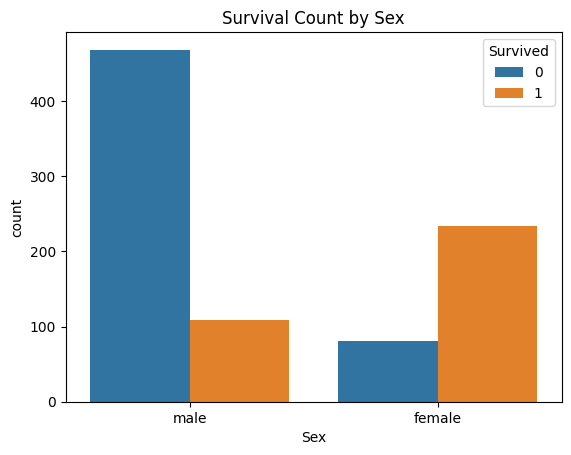

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()


To determine if there is a correlation between survival and age.


In [129]:
df.groupby('Sex').agg({'PassengerId': 'count',
                      'Survived': 'sum',
                      'Age': 'mean'})


,PassengerId,Survived,Age
Sex,,,
female,314,233,27.915709
male,577,109,30.726645


In [131]:
df[['Survived','Age']].corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


There is a weak linear relationship between Survival and Age. This also means that as age increases, survival chances tend to reduce.